# 1 Постановка задачи

Ниже представлена часть базы данных лабораторных исследований для группы контроля (группа сравнения) и трех типов заболеваний. Данные имеют шифровку, так как находятся на стадии сбора,анализа и еще не представлены в печати.

# 2 Теоретическое описание
2.1 В дисперсионном анализе проверяется гипотеза H0 о равенстве средних групповых значений количественного показателя: 

$$(H_0: \overline{y}_1 = \overline{y}_2 = ... = \overline{y}_k).$$

Чтобы проверить эту гипотезу, необходимо воспользоваться соотношением:

$$F_H = \frac{\sigma_{F}^{2}}{\sigma_{ост}^{2}}$$

Если значение  FH  превышает  Fкрит  из таблицы критических точек распределения Фишера-Снедекора для заданного уровня

значимости  α  двух степеней свободы  dfмежд=k−1  (относится к числителю соотношения) и  dfвнутр=n−k  (относится к знаменателю),

то выборки имеют разные средние значения.

2.2 T-критерий Стьюдента (t-критерий Стьюдента) - это тест статистической гипотезы, назван в честь псевдонима «Студент», который использовал Уильям Сили Госсет, разработавший тест. Этот тест проверяет средние значения по двум образцам, чтобы определить, существенно ли они отличаются. Это делается путем вычисления стандартной ошибки разницы между средними значениями. Наличие в двух выборках одного и того же среднего значения (нулевая гипотеза) можно интерпретировать как степень вероятности различия. Статистику t, вычисленную с помощью теста, можно объяснить путем сравнения с критическим значением распределения t. Степень свободы и уровень значимости процентильной функции (PPF) можно использовать для расчета критического значения.

# 3 Практическая реализация
3.1 Исходные данные загружаются из файла Excel, реализованы две функции:

3.2 znachimost(a,b,c,d,p) - для оценки различия средних группы фактора a,b,c,d дисперсионным анализом с заданным уровнем значимости p;

3.3 Student_pair(a,b,p) - для оценки различия средних значений факторов a,b критерием Стьюдента с заданным уровнем значимости p;

In [79]:
#
#  Подгружаем необходимые библиотеки
#

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from math import sqrt
import scipy.stats as stats
from matplotlib.pyplot import figure
from scipy.stats import t
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [80]:
file = 'курсовая.xlsx'


In [81]:
df = pd.ExcelFile(file)
df

In [82]:
print(df.sheet_names)

['Лист1', 'Лист2', 'Лист3']


In [83]:
df1 = df.parse('Лист1')

In [84]:
df1

,V_k,T_k,V_f,T_f,V_m,T_m,V_h,T_h
0,37.30,1.10,51.2,0.9,37.2,1.1,25.4,0.6
1,27.70,NaN,22.9,1.0,48.5,1.1,25.8,1.1
2,17.45,1.25,54.3,1.1,32.5,1.2,44.9,1.1
3,33.00,1.20,11.0,0.9,33.4,1.3,17.5,1.2
4,27.10,1.30,82.9,1.0,54.1,1.2,23.4,1.2
...,...,...,...,...,...,...,...,...
77,NaN,NaN,NaN,NaN,31.1,1.2,NaN,NaN
78,NaN,NaN,NaN,NaN,34.3,1.0,NaN,NaN
79,NaN,NaN,NaN,NaN,48.8,1.0,NaN,NaN
80,NaN,NaN,NaN,NaN,31.6,0.8,NaN,NaN


In [85]:
df1.describe()

,V_k,T_k,V_f,T_f,V_m,T_m,V_h,T_h
count,39.000000,39.000000,53.000000,53.000000,82.000000,81.000000,11.000000,11.000000
mean,29.988718,1.112821,46.533585,1.048113,37.638780,1.035185,28.209091,1.036364
std,5.209283,0.192189,14.336361,0.170959,10.543005,0.133568,8.197372,0.185864
min,17.450000,0.800000,11.000000,0.600000,21.200000,0.800000,17.500000,0.600000
25%,27.380000,1.000000,36.150000,0.950000,30.125000,0.900000,23.300000,1.000000
50%,30.300000,1.050000,43.700000,1.000000,34.350000,1.000000,25.800000,1.000000
75%,32.535000,1.225000,56.600000,1.150000,42.325000,1.100000,31.950000,1.150000
max,45.100000,1.650000,82.900000,1.600000,69.600000,1.300000,44.900000,1.300000


In [86]:
V_k = np.array(df1['V_k'],dtype=np.float64)
V_k = V_k[np. isfinite(V_k)]

In [87]:
V_f = np.array(df1['V_f'],dtype=np.float64)
V_f = V_f[np. isfinite(V_f)]

In [88]:
V_m = np.array(df1['V_m'],dtype=np.float64)
V_m = V_m[np. isfinite(V_m)]

In [89]:
V_h = np.array(df1['V_h'],dtype=np.float64)
V_h = V_h[np. isfinite(V_h)]

Анализ начинаем с параметра V. Строим дот-плоты распределения данных, среднее и отклонение от среднего получено ранее встроенными командами Python, ищем статистически значимые различия между группами.

Text(0, 0.5, 'Vi,um/min')

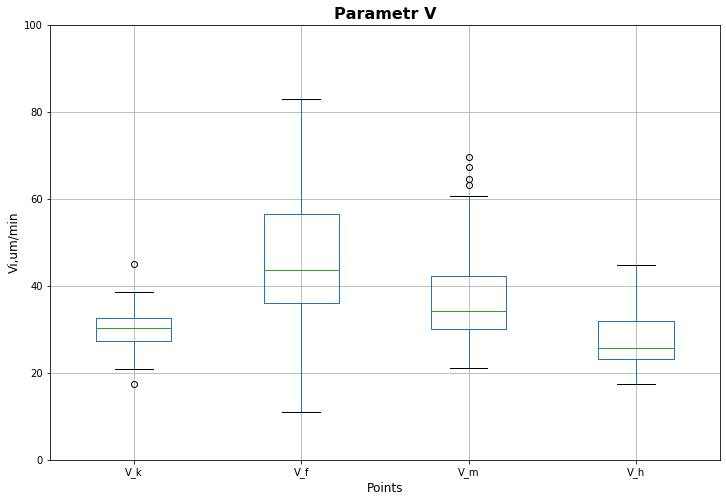

In [90]:
df1.boxplot(column=['V_k','V_f', 'V_m','V_h'])  
plt.ylim(0,100)
plt.title('Parametr V', fontsize=16, fontweight="bold")
plt.xlabel('Points',fontsize=12)
plt.ylabel('Vi,um/min',fontsize=12)



На графике представлены dot-plots контрольной группы и групп сравнения для параметра Т (Т_к и Т_f, T_m, T_h, соответственно)

In [76]:
def znachimost(a,b,c,d,p):
#
#   a,b,c,d - исследуемые величины   ; p - уровень значимости
#   Проведение однофакторный дисперсионный анализ для определения различия средних величин a b c d  с заданным уровнем p
#
    e = np.concatenate([a, b,c,d])
    n_a = a.shape[0]
    n_b = b.shape[0]
    n_c = c.shape[0]
    n_d = d.shape[0]
#
#    Средние значения для каждой из величин на входе
#
    a_mean = a.mean()
    b_mean = b.mean()
    c_mean = c.mean()    
    d_mean = d.mean()
    e_mean = e.mean()
#
#   Оценим критерии
#

    S2_F = n_a * (a_mean - e_mean) ** 2 + n_b * (b_mean - e_mean) ** 2 + n_c*(c_mean - e_mean) ** 2 + n_d*(d_mean - e_mean) ** 2
    S2_res = ((a - a_mean) ** 2).sum() + ((b - b_mean) ** 2).sum()+ ((c - c_mean) ** 2).sum() + ((d - d_mean) ** 2).sum()
    
    k = 4
    n = n_a + n_b + n_c + n_d
    
    k1 = k - 1
    k2 = n - k
#
#   Найдем общую дисперсию:
#
    sigma2_F = S2_F / k1
#
#   Найдем выборочную дисперсию
#
    sigma2_res= S2_res / k2
#   
    T = sigma2_F/sigma2_res
    F = stats.f.ppf(1 - p, k1, k2)
#
#   Если T>F, то средние значения различны (True) c заданным уровнем значимости
#
    return (T>F)




def Student_pair(a,b,p):
#
#   Оценка статистики двух независимых выборок по критерию Стьюдента    
#    a,b,- исследуемые величины   ; p - уровень значимости
#   
#    e = np.concatenate([a, b])
    n_a = a.shape[0]
    n_b = b.shape[0]

    a_mean = a.mean()
    b_mean = b.mean()

   
    S2_a = ((a - a_mean) ** 2).sum()/(n_a - 1)
    S2_b = ((b - b_mean) ** 2).sum()/ (n_b-1)
#
#  вычисляем абсолютное значение тестовой статистики и 
#  сравниваем его с положительным (правым) критическим значением, как показано ниже:
#

    t_stat= abs(a_mean-b_mean)/sqrt(S2_a/n_a+S2_b/n_b)
    
    cv = t.ppf(1.0 - p, n_a+n_b-2)
    p_est = (1.0 - t.cdf(abs(t_stat), n_a+n_b-2))*2.0
#
#   Если p_est<p, то средние значения различны (True) c заданным уровнем значимости
#
    
    return (p_est<p)



# Результаты оценок

In [15]:
znachimost(V_f,V_k,V_m,V_h,0.05)

True

- Методом дисперсионного анализа установлены, что факторы V_f,V_k,V_m,V_h с уровнем значимости 0.05 статистически значимо различаются

In [17]:
Student_pair(V_k,V_h,0.05)

False

- Т.е факторы V_k и V_h с уровнем значимости 0.05 статистически достоверно не отличаются ;



In [18]:
Student_pair(V_k,V_m,0.05)

True

 - Т.е факторы V_k и V_m с уровнем значимости 0.05 статистически значимо отличаются;

In [19]:
Student_pair(V_k,V_f,0.05)

True

  - Т.е факторы V_k и V_f с уровнем значимости 0.05 статистически значимо отличаются

In [20]:
Student_pair(V_m,V_f,0.05)

True

- Т.е факторы V_m и V_f с уровнем значимости 0.05 имеют статистически достоверное отличие

In [94]:
Student_pair(V_h,V_f,0.05)

True

- Т.е факторы V_h и V_f с уровнем значимости 0.05 имеют статистически достоверное отличие

In [95]:
Student_pair(V_m,V_h,0.05)

True

- Т.е факторы V_m и V_h с уровнем значимости 0.05 имеют статистически достоверное отличие

Аналогично параметру V, проводится анализ для параметра Т.

Text(0, 0.5, 'T,min')

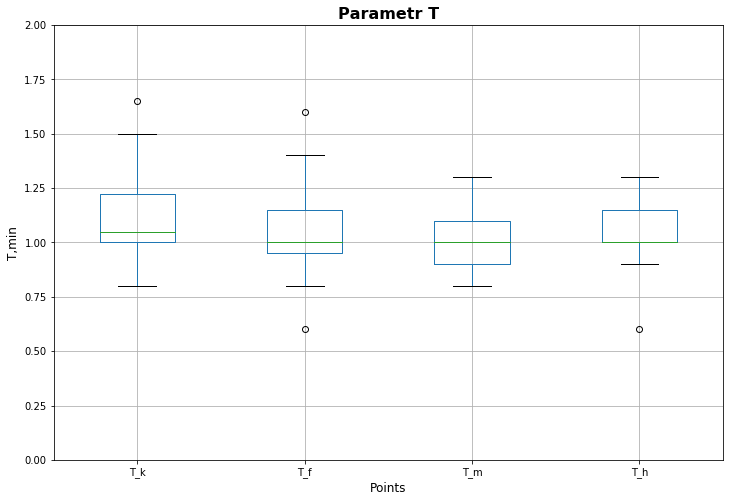

In [75]:
df1.boxplot(column=['T_k','T_f', 'T_m','T_h'])  
plt.ylim(0,2)
plt.title('Parametr T', fontsize=16, fontweight="bold")
plt.xlabel('Points',fontsize=12)
plt.ylabel('T,min',fontsize=12)


На графике представлены dot-plots контрольной группы и групп сравнения для параметра Т (Т_к и Т_f, T_m, T_h, соответственно)

In [91]:
T_k = np.array(df1['T_k'],dtype=np.float64)
T_k = T_k[np. isfinite(T_k)]
T_f = np.array(df1['T_f'],dtype=np.float64)
T_f = T_f[np. isfinite(T_f)]
T_m = np.array(df1['T_m'],dtype=np.float64)
T_m = T_m[np. isfinite(T_m)]
T_h = np.array(df1['T_h'],dtype=np.float64)
T_h = T_h[np. isfinite(T_h)]

In [92]:
znachimost(T_f,T_k,T_m,T_h,0.05)

False

- Методом дисперсионного анализа установлены, что факторы T_f,T_k,T_m,T_h с уровнем значимости 0.05 статистически значимо не различаются

In [96]:
Student_pair(T_k,T_m,0.05)

True

- Т.е факторы T_m и T_k с уровнем значимости 0.05 имеют статистически достоверное отличие

In [37]:
Student_pair(T_k,T_h,0.05)

False

- Т.е факторы T_k и T_h с уровнем значимости 0.05 не имеют статистически достоверное отличие

In [38]:
Student_pair(T_k,T_f,0.05)

False

- Т.е факторы T_k и T_f с уровнем значимости 0.05  статистически достоверно не отличаются

In [78]:
Student_pair(T_m,T_f,0.05)

False

In [ ]:
- Т.е факторы T_m и T_f с уровнем значимости 0.05  статистически достоверно не отличаются

In [97]:
Student_pair(T_h,T_f,0.05)

False

- Т.е факторы T_h и T_f с уровнем значимости 0.05  статистически достоверно не отличаются

In [98]:
Student_pair(T_m,T_h,0.05)

False

- Т.е факторы T_h и T_m с уровнем значимости 0.05  статистически достоверно не отличаются